In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

In [2]:
pwd

'/Users/sangeethsnair'

In [3]:
#Loading the dataset
train = pd.read_csv('/Users/sangeethsnair/Desktop/houseprices/train.csv')
test = pd.read_csv('/Users/sangeethsnair/Desktop/houseprices/test.csv')

In [4]:
# Finding the shape of train set
train.shape

(1460, 81)

In [5]:
# Findinf the shape of test set
test.shape

(1459, 80)

In [6]:
# Getting the datatype of train set
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [7]:
#Getting the datatype of test set
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [8]:
#Getting the id of test dataset:
ids = test["Id"]

In [9]:
# Now we have to categorize the features into numerical forms in train set:
numerical_features = train._get_numeric_data()
numerical_features.shape

(1460, 38)

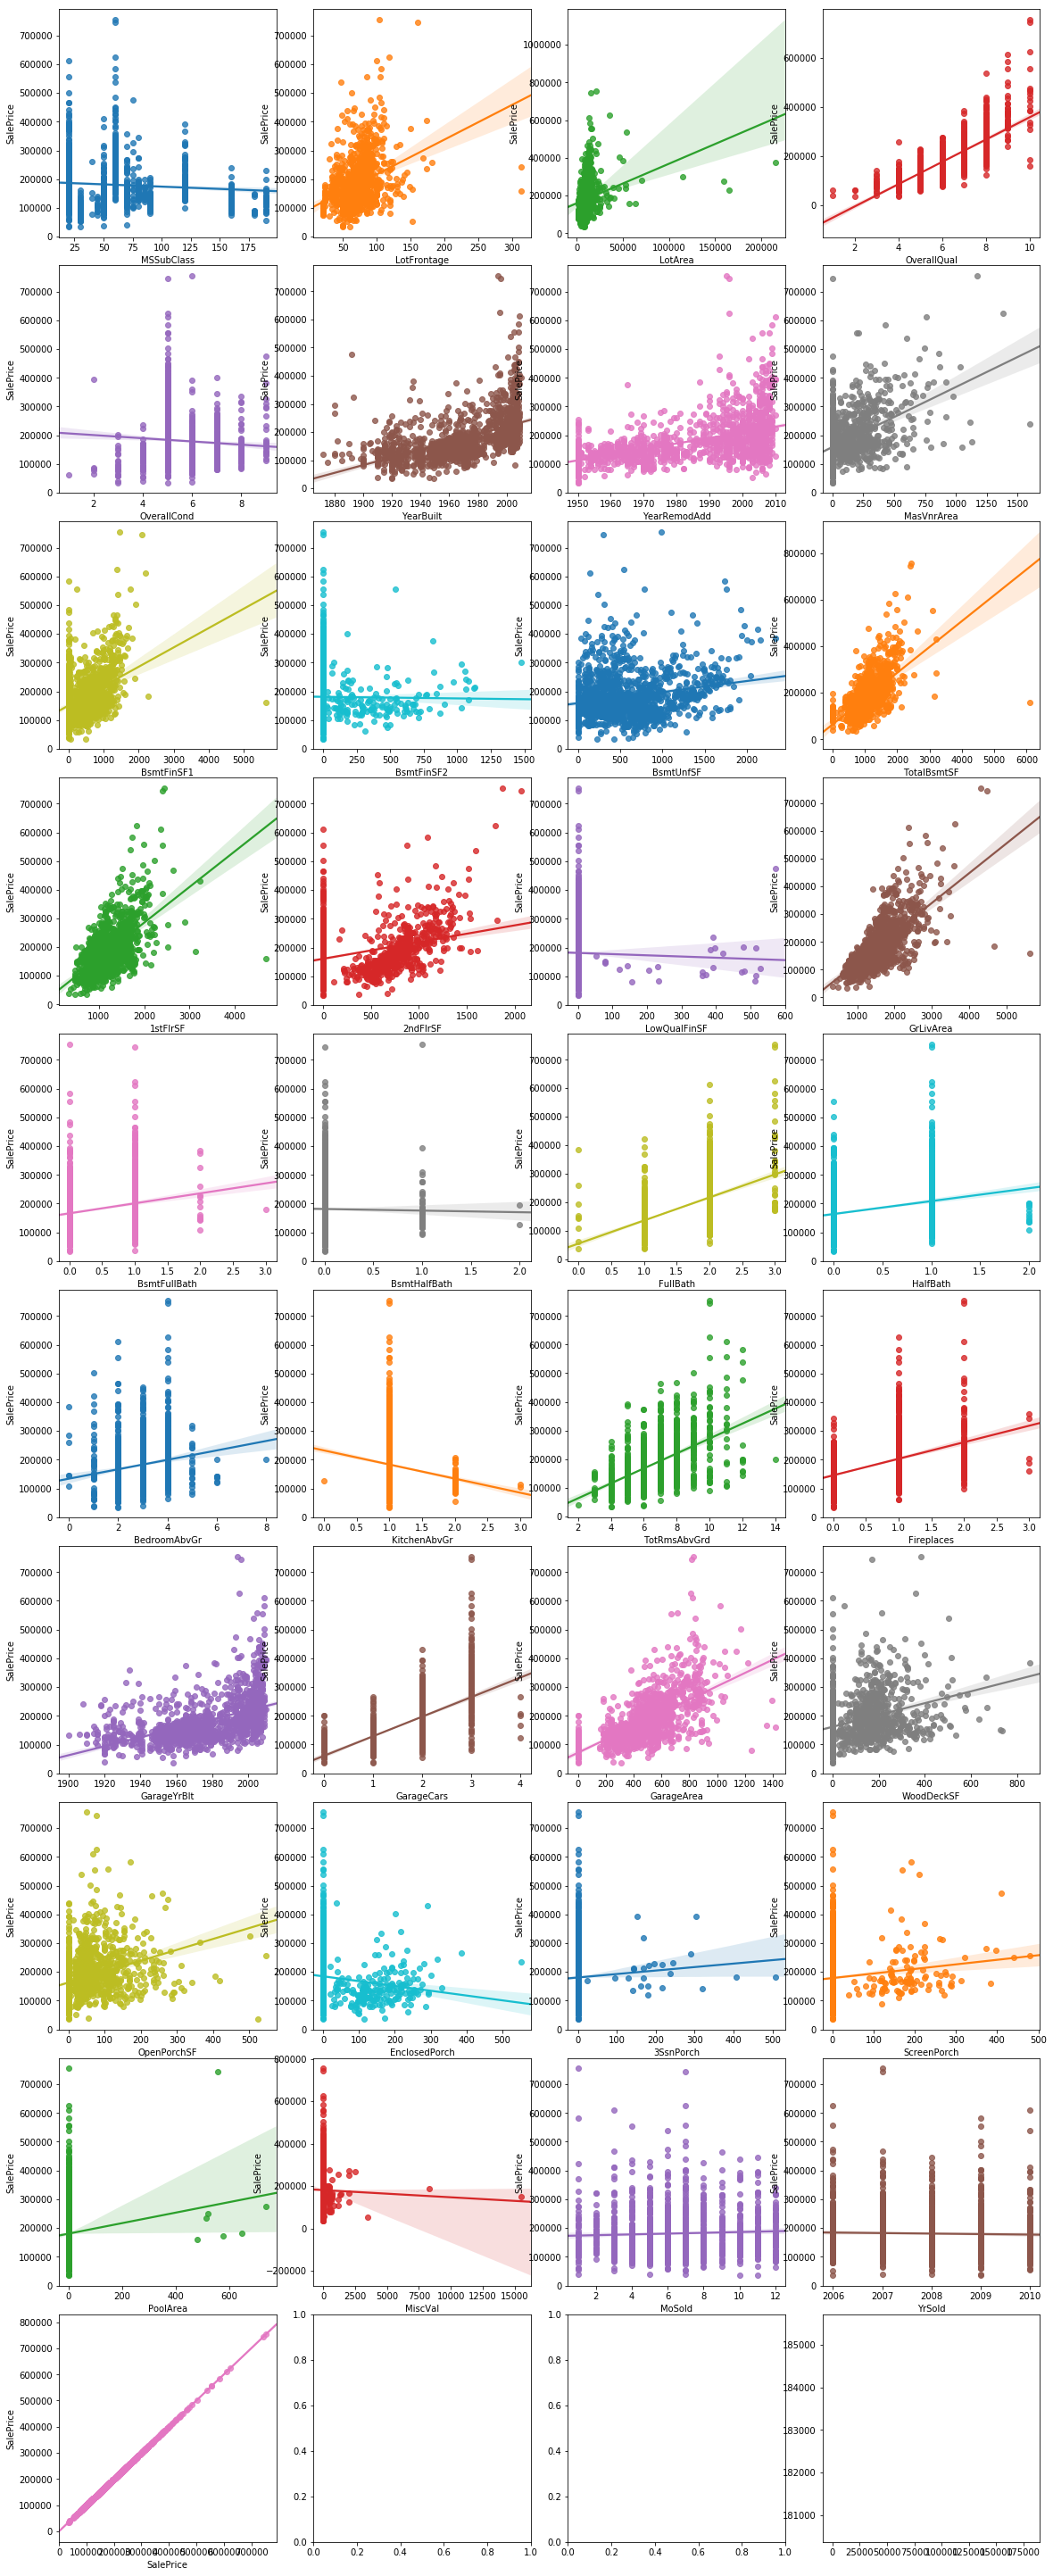

In [10]:
# There are 38 numerical features, fitting a 4x10 subplot in train set:
numerical_features.drop("Id", axis=1, inplace=True)
fig, axes = plt.subplots(10, 4, figsize=[16,40])
fig.tight_layout()
axes = np.ravel(axes)
for i, column in enumerate(numerical_features.columns):
    sns.regplot(column, "SalePrice", numerical_features, dropna=True, ax = axes[i])

In [11]:
# Now we have to categorize the features into categorical forms in train set:
categorical_features = train.select_dtypes("object")

In [12]:
# Now create a dataframe :
cat_data = pd.concat([categorical_features, train["SalePrice"]], axis=1)
cat_data.shape

(1460, 44)

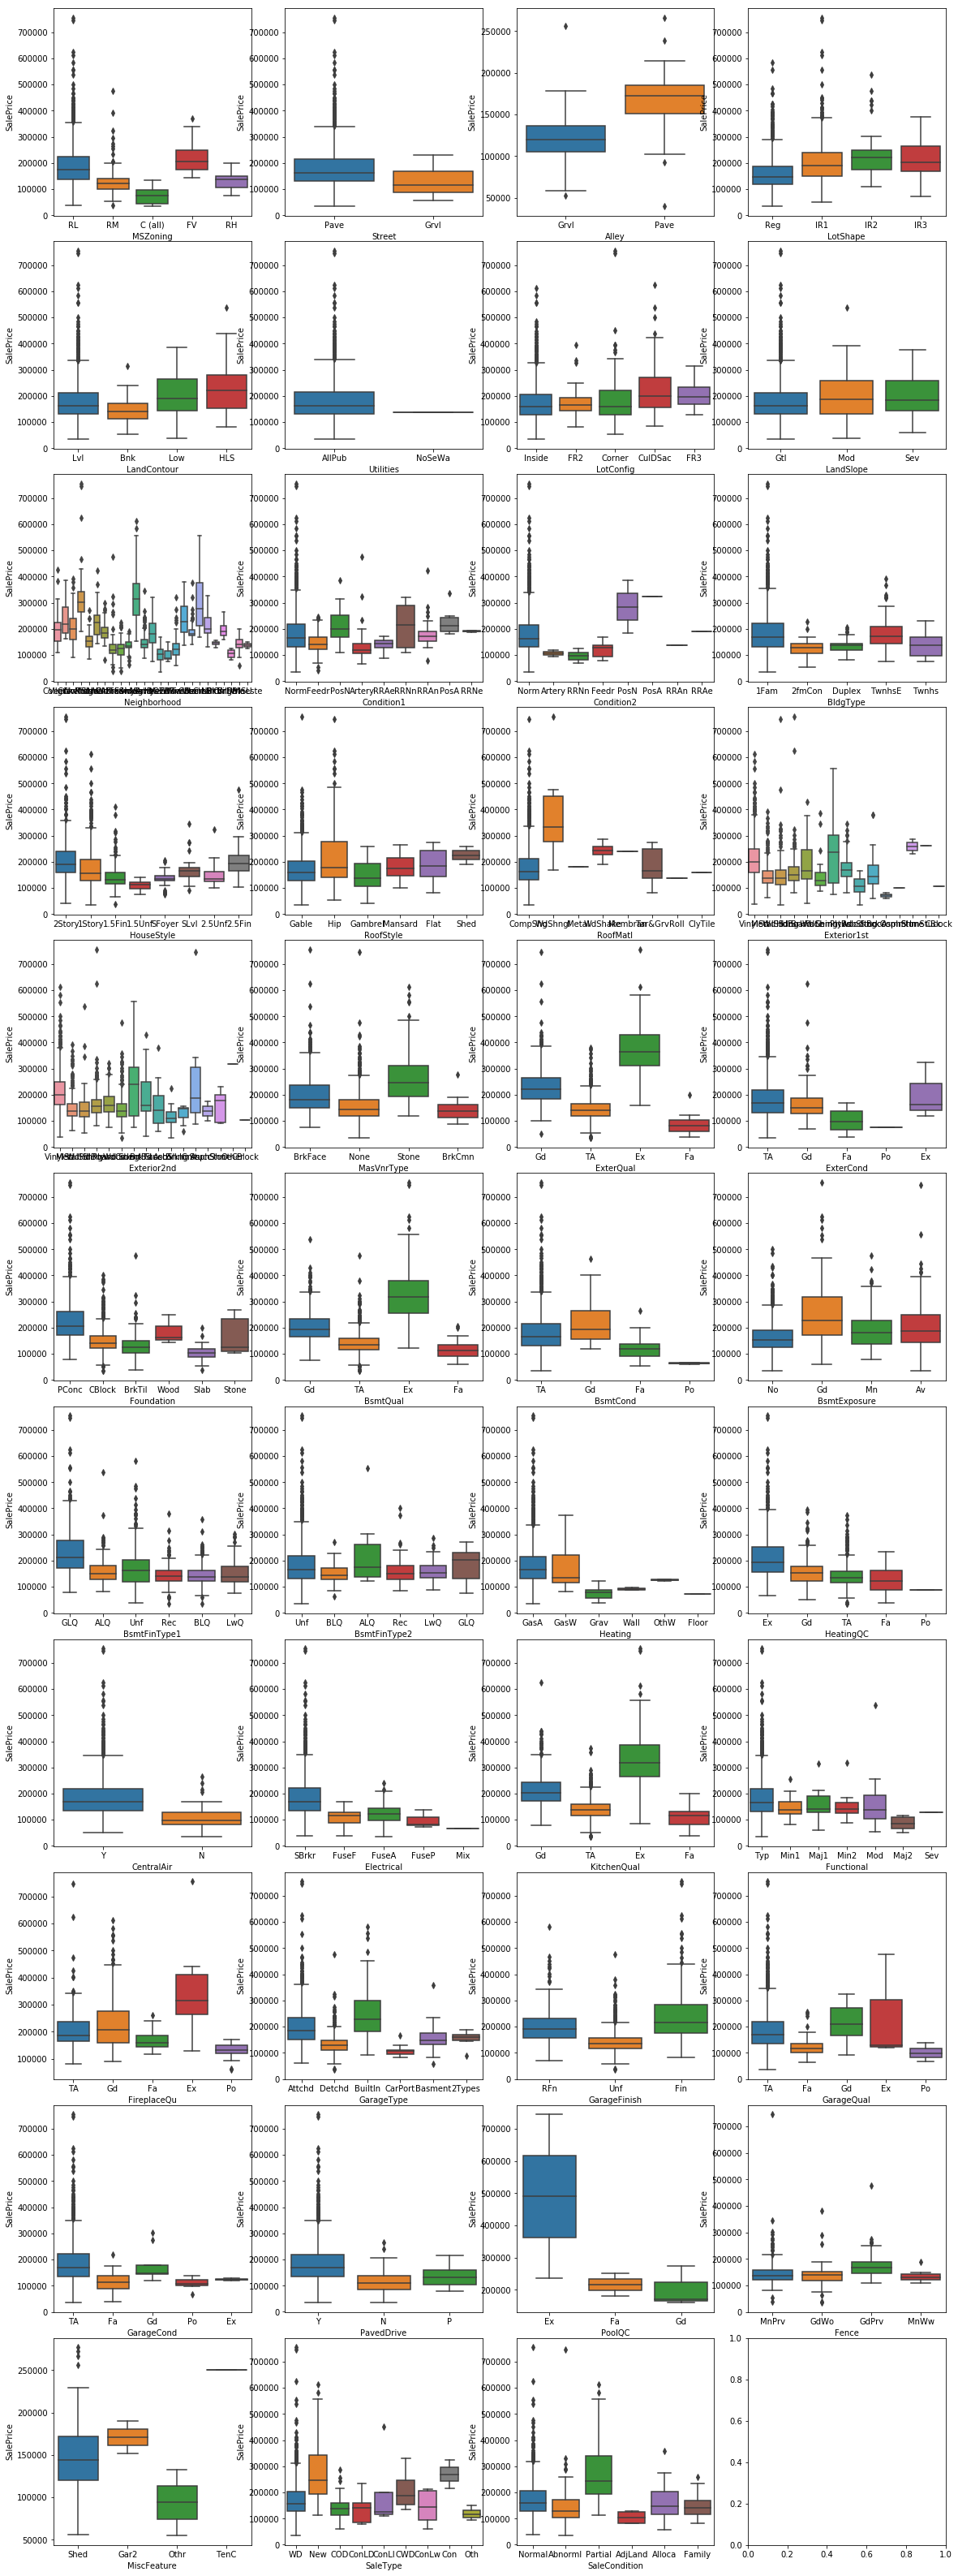

In [13]:
# 44 features fit in a 4x11 subplot
fig, axes = plt.subplots(11, 4, figsize=[16,44])
fig.tight_layout()
axes = np.ravel(axes)
for i, column in enumerate(cat_data.columns):
    if column == "SalePrice": break
    sns.boxplot(data = cat_data, y = "SalePrice",x = column, ax = axes[i])

In [14]:
#Dropping the id column since they dont have any dependency on the sale price variable 
trainset = train.drop('Id', axis = 1)
testset = test.drop('Id', axis = 1)

# Outliers

Focusing on outliers, defined by Gladwell as people who do not fit into our normal understanding of achievement.  An outlier is a data point that is distant from other similar points. They may be due to variability in the measurement or may indicate experimental errors. If possible, outliers should be excluded from the data set. We'll do a quick analysis through the standard deviation of 'SalePrice' and a set of scatter plots.

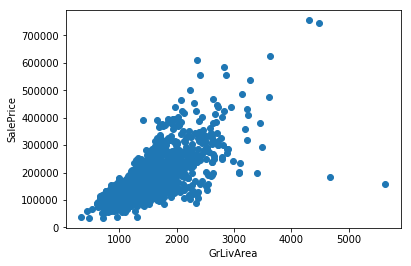

In [15]:
# Plotting the SalePrice Vs GrLivArea
plt.scatter(x = trainset["GrLivArea"], y =trainset["SalePrice"])
plt.ylabel("SalePrice")
plt.xlabel("GrLivArea")
plt.show()

In [16]:
# removing oultiers,which has > than 4000 GrLivArea square feet and < than 300000 SalePrice from the dataset
train_data = trainset.drop(trainset[(trainset["GrLivArea"]>4000) &(trainset["SalePrice"]<300000)].index).reset_index(drop=True)

In [17]:
traindata_len = len(train_data)
traindata_len

1458

# Sale Price analysis:

Here SalePrice is our target variable and we can see the info about it

In [18]:
train_Sale = train_data["SalePrice"].describe()
train_Sale

count      1458.000000
mean     180932.919067
std       79495.055285
min       34900.000000
25%      129925.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

The mean of(average) sale price is 180932.919067 with the minimum sale price of a house being 34900 and the maximum (std deviation) of about 755000

For the sale of houses, there are variables that affect the sale prices are:

The type of dwelling(building types); The neighborhood;Year built; The sytle of dwealing(housestyle); Type of foundation; Pool area; Fence; Availability of garage; Availability of fireplaces; Bathrooms; Bedrooms; Area of the building; Type of heating


A correlation test is performed. This measures the relationship between the variables and the sale price of houses.

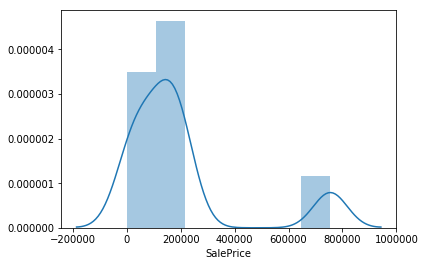

In [19]:
sns.distplot(train_Sale)

In [20]:
# Correlation test 
correlation = train_data.corr()
correlation.sort_values(["SalePrice"])
correlation.SalePrice

MSSubClass      -0.084276
LotFrontage      0.370584
LotArea          0.268179
OverallQual      0.795774
OverallCond     -0.077948
YearBuilt        0.523608
YearRemodAdd     0.507717
MasVnrArea       0.482719
BsmtFinSF1       0.409384
BsmtFinSF2      -0.011422
BsmtUnfSF        0.214460
TotalBsmtSF      0.651153
1stFlrSF         0.631530
2ndFlrSF         0.320532
LowQualFinSF    -0.025625
GrLivArea        0.734968
BsmtFullBath     0.228459
BsmtHalfBath    -0.016881
FullBath         0.562165
HalfBath         0.284590
BedroomAbvGr     0.168245
KitchenAbvGr    -0.135946
TotRmsAbvGrd     0.537769
Fireplaces       0.469862
GarageYrBlt      0.487156
GarageCars       0.641047
GarageArea       0.629217
WoodDeckSF       0.324758
OpenPorchSF      0.321142
EnclosedPorch   -0.128646
3SsnPorch        0.044568
ScreenPorch      0.111415
PoolArea         0.099490
MiscVal         -0.021203
MoSold           0.046124
YrSold          -0.028882
SalePrice        1.000000
Name: SalePrice, dtype: float64

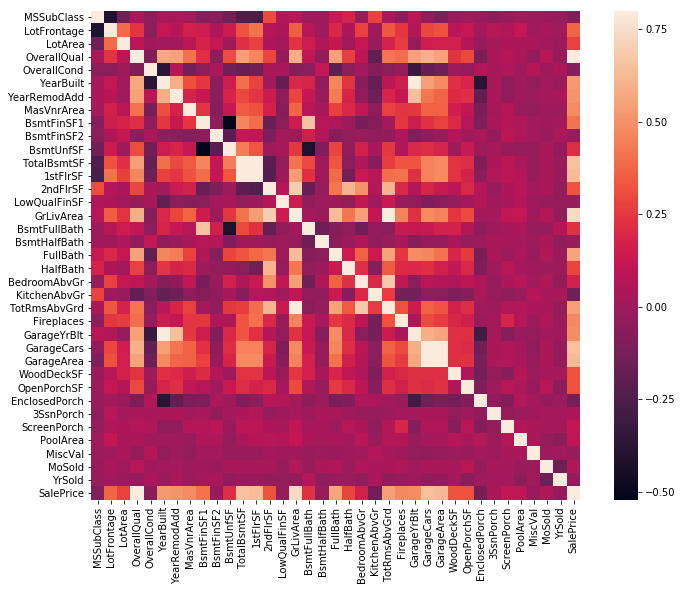

In [21]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(correlation, vmax=.8, square=True);

from the above correlation matrix, it can be seen that the variables that extremely significant to the sale price of a house are the OverallQuality, Yearbuilt, YearRemolded, Masonry veneer, Total square feet of basement area, First Floor square feet, Above grade (ground) living area square feet, the garage area in square feet, the garage size in terms of car capacity, Year garage was built, the fireplace, Total rooms above grade

In [22]:
#Finding the skewness and kurtosis of data:
skewness = skew(train_data["SalePrice"])
kurtosis = kurtosis(train_data["SalePrice"])

In [23]:
print("Skewness of the train data:" , skewness)
print("Kurtosis of the train data:", kurtosis)

Skewness of the train data: 1.8793604459195012
Kurtosis of the train data: 6.496606038358726


From the value we can figure outthat the data is highly skewed to the right, since its skewness is geater than 1. Moreover, we can also infer the data set is not normally distributed since the kurtosis is greater than one.

In [24]:
# Finding mean and standard deviation:
mean = train_data["SalePrice"].describe()['mean']
SD = train_data["SalePrice"].describe()['std'] # deviation of data from mean
print("mean:", mean)
print("Standard deviation:" , SD)

mean: 180932.91906721535
Standard deviation: 79495.05528474762


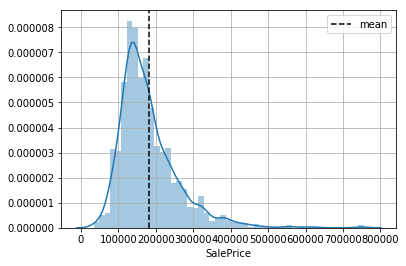

In [32]:
#plotting skewness 
sns.distplot(train_data["SalePrice"], norm_hist = True)
plt.axvline(x = mean, color = "black", linestyle = "--", label = "mean")
plt.legend()
plt.grid()
plt.show()

In [26]:
# We obtained normal distribution, by taking the log of it 
new_data = np.log1p(train_data["SalePrice"])
new_data.describe()

count    1458.000000
mean       12.024015
std         0.399713
min        10.460271
25%        11.774720
50%        12.001512
75%        12.273736
max        13.534474
Name: SalePrice, dtype: float64

In [27]:
mean_new_data = new_data.describe()["mean"]
std_new_data = new_data.describe()["std"]
print("mean:", mean_new_data)
print("standard deviation:", std_new_data)

mean: 12.02401515568252
standard deviation: 0.3997128276063394


In [28]:
print("skewness of new_data:", new_data.skew())
print("kurtosis of new_data:", new_data.kurt())

skewness of new_data: 0.12157976050304875
kurtosis of new_data: 0.8047507917418972


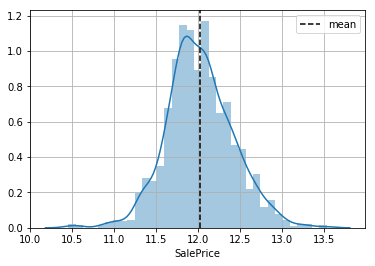

In [31]:
sns.distplot(new_data, norm_hist = True)
plt.axvline(x = mean_new_data, color = "black", linestyle = "--", label = "mean")
plt.legend()
plt.grid()
plt.show()

# Feature Engineering

In [33]:
# Concating the train and test set:
data = pd.concat((train_data,testset))

/Users/sangeethsnair/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [34]:
data.shape

(2917, 80)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2917 entries, 0 to 1458
Data columns (total 80 columns):
1stFlrSF         2917 non-null int64
2ndFlrSF         2917 non-null int64
3SsnPorch        2917 non-null int64
Alley            198 non-null object
BedroomAbvGr     2917 non-null int64
BldgType         2917 non-null object
BsmtCond         2835 non-null object
BsmtExposure     2835 non-null object
BsmtFinSF1       2916 non-null float64
BsmtFinSF2       2916 non-null float64
BsmtFinType1     2838 non-null object
BsmtFinType2     2837 non-null object
BsmtFullBath     2915 non-null float64
BsmtHalfBath     2915 non-null float64
BsmtQual         2836 non-null object
BsmtUnfSF        2916 non-null float64
CentralAir       2917 non-null object
Condition1       2917 non-null object
Condition2       2917 non-null object
Electrical       2916 non-null object
EnclosedPorch    2917 non-null int64
ExterCond        2917 non-null object
ExterQual        2917 non-null object
Exterior1st      291

In [36]:
# dropping the target variable from the concated data:
data_new = data.drop("SalePrice", axis =1)

In [37]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2917 entries, 0 to 1458
Data columns (total 79 columns):
1stFlrSF         2917 non-null int64
2ndFlrSF         2917 non-null int64
3SsnPorch        2917 non-null int64
Alley            198 non-null object
BedroomAbvGr     2917 non-null int64
BldgType         2917 non-null object
BsmtCond         2835 non-null object
BsmtExposure     2835 non-null object
BsmtFinSF1       2916 non-null float64
BsmtFinSF2       2916 non-null float64
BsmtFinType1     2838 non-null object
BsmtFinType2     2837 non-null object
BsmtFullBath     2915 non-null float64
BsmtHalfBath     2915 non-null float64
BsmtQual         2836 non-null object
BsmtUnfSF        2916 non-null float64
CentralAir       2917 non-null object
Condition1       2917 non-null object
Condition2       2917 non-null object
Electrical       2916 non-null object
EnclosedPorch    2917 non-null int64
ExterCond        2917 non-null object
ExterQual        2917 non-null object
Exterior1st      291

In [76]:
# Checking if there are any null values:
data_new.isnull().values.any()

True

In [77]:
#Displaying variables contain the missing values and their total
pd.set_option('display.max_rows', 79) 
data_new.isnull().sum()

1stFlrSF            0
2ndFlrSF            0
3SsnPorch           0
Alley               0
BedroomAbvGr        0
BldgType            0
BsmtCond            0
BsmtExposure        0
BsmtFinSF1          0
BsmtFinSF2          0
BsmtFinType1        0
BsmtFinType2        0
BsmtFullBath        0
BsmtHalfBath        0
BsmtQual            0
BsmtUnfSF           0
CentralAir          0
Condition1          0
Condition2          0
Electrical          0
EnclosedPorch       0
ExterCond           0
ExterQual           0
Exterior1st         0
Exterior2nd         0
Fence            2346
FireplaceQu         0
Fireplaces          0
Foundation          0
FullBath            0
Functional          0
GarageArea          0
GarageCars          0
GarageCond          0
GarageFinish        0
GarageQual          0
GarageType          0
GarageYrBlt         0
GrLivArea           0
HalfBath            0
Heating             0
HeatingQC           0
HouseStyle          0
KitchenAbvGr        0
KitchenQual         0
LandContou

To deal with the missing values, they can either be dropped or imputed.Here most of the variables which has missing values are likely to affect the sale price of a house, and these missing values can therefore be imputed.

# Dealing the Categorical data by imputation filled with "None"

In [99]:
#Dealing qualitative data:
#Features-MiscFeature,PoolQC,Fence,MasVnrtype,Alley,BsmtQual,BsmtCond,BsmtExposure, BsmtFinType2, BsmtFinType1, GarageType, GarageFinish, GarageQual and GarageCond

data_new["MasVnrType"].fillna("None", inplace = True)
data_new["Alley"].fillna("None", inplace = True) # no access to alley
data_new["BsmtQual"].fillna("None", inplace = True)# no basement
data_new["BsmtCond"].fillna("None", inplace = True)
data_new["BsmtExposure"].fillna("None", inplace = True)
data_new["BsmtFinType1"].fillna("None", inplace = True)
data_new["BsmtFinType2"].fillna("None", inplace = True)
data_new["FireplaceQu"].fillna("None", inplace = True) # no fireplace 
data_new["GarageType"].fillna("None", inplace = True) # no garage
data_new.loc[data_new["GarageType"] == "None","GarageFinish"] = "None"
data_new.loc[data_new["GarageType"] == "None","GarageQual"] = "None"
data_new.loc[data_new["GarageType"] == "None","GarageCond"] = "None"
data_new.loc[data_new["GarageType"] == "None","GarageYrBlt"] = data_new["YearBuilt"][data_new["GarageType"]=="None"]
data_new["Fence"].fillna("None", inplace = True)
data_new["PoolQC"].fillna("None", inplace = True)
data_new["MiscFeature"].fillna("None", inplace = True)

# Dealing the Numerical data by imputation filled with "0" or "Median"

In [100]:
#Dealing the quantiative data: 

# Dealing imputation with median:
# Feature - Lotfrontage , MasVnrtype,MasVnrArea, GarageArea,GarageCars,GarageYrblt:
median = data_new["LotFrontage"].median()#For Lotfrontage, the median can be used to replace the missing values since it is a float 
data_new["LotFrontage"].fillna(median, inplace = True)

#the number of missing values for MasVnrType is not the same as the number of missing values for MasVnrArea. Therefore,
#where the value of MasVnrType is avaliable, the median of MasVnrArea would be used to impute the missing value 
data_new.loc[data_new["MasVnrType"] == "None","MasVnrArea"] = 0
data_new["MasVnrArea"] = data_new["MasVnrArea"].fillna(data_new["MasVnrArea"].median())

#It could been seen that, the number of missing values of GarageType does not correspond with the number of missing values for GarageYrBlt, GarageArea, GarageCars, GarageFinish, GarageQual and GarageCond. 
#Therefore, houses with GarageType but no GarageYrBlt, GarageArea, GarageCars, GarageFinish, GarageQual and GarageCond, will have them imputed for but using the median of the quantative data 
data_new["GarageArea"] = data_new["GarageArea"].fillna(data_new["GarageArea"].median())
data_new["GarageCars"] = data_new["GarageCars"].fillna(data_new["GarageCars"].median())
data_new["GarageYrBlt"] = data_new["GarageYrBlt"].fillna(data_new["GarageYrBlt"].median())

#Filling the missing value with zero
#Feature - BsmtFinSF1,BsmtFinSF2,BsmtFullBath, BsmtHalfBath, BsmtUnfSF, TotalBsmtSF
data_new["BsmtFinSF1"].fillna(0, inplace = True)# No basement
data_new["BsmtFinSF2"].fillna(0, inplace = True)
data_new["BsmtFullBath"].fillna(0, inplace = True)
data_new["BsmtHalfBath"].fillna(0, inplace = True)
data_new["BsmtUnfSF"].fillna(0, inplace = True)
data_new["TotalBsmtSF"].fillna(0, inplace = True)

#No garage which means they can be replaced with Same can be done to GarageCars and GarageYrBlt.
data_new.loc[data_new["GarageType"] == "None","GarageCars"] = 0
data_new.loc[data_new["GarageType"] == "None","GarageArea"] = 0



# Data imputation by finding the mode of the features and replacing it

In [101]:
# finding the mode and replacing the missing value with mostly used
data_new["Exterior1st"].mode()
data_new["Exterior2nd"].mode()


0    VinylSd
dtype: object

In [102]:
#setting the missing value to Vinyl Siding since that is what is mostly used 
data_new["Exterior1st"].fillna("VinylSd", inplace = True)
data_new["Exterior2nd"].fillna("VinylSd", inplace = True)

In [103]:
# finding the mode and replacing the missing value with mostly used
data_new["Functional"].mode()

0    Typ
dtype: object

In [104]:
#setting the missing value to Typical Functionality since that is what is mostly used 
data_new["Functional"].fillna("Typ", inplace = True)

In [105]:
#Houses with GarageType but no GarageYrBlt, GarageArea, GarageCars, GarageFinish, GarageQual and GarageCond, will have them imputed for but using the median of the quantative data 
data_new["GarageFinish"].mode()

0    Unf
dtype: object

In [106]:
#setting the missing value to Unf since that is what is mostly used 
data_new["GarageFinish"].fillna("Unf", inplace = True)

In [107]:
data_new["GarageQual"].mode()

0    TA
dtype: object

In [108]:
data_new["GarageCond"].mode()

0    TA
dtype: object

In [109]:
data_new["KitchenQual"].mode()

0    TA
dtype: object

In [110]:
#setting the missing value to TA since that is what is mostly used 
data_new["GarageQual"].fillna("TA", inplace = True)
data_new["GarageCond"].fillna("TA", inplace = True)
data_new["KitchenQual"].fillna("TA", inplace = True)

In [111]:
data_new["Electrical"].mode()

0    SBrkr
dtype: object

In [112]:
#setting the missing value to Sbrkr since that is what is mostly used 
data_new["Electrical"].fillna("SBrKr", inplace = True)

In [113]:
data_new["MSZoning"].mode()

0    RL
dtype: object

In [114]:
#setting the missing value to RL since that is what is mostly used 
data_new["MSZoning"].fillna("RL", inplace = True)

In [115]:
data_new["SaleType"].mode()

0    WD
dtype: object

In [116]:
#setting the missing value to WD since that is what is mostly used 
data_new["SaleType"].fillna("WD", inplace = True)

In [117]:
data_new["Utilities"].mode()

0    AllPub
dtype: object

In [118]:
#setting the missing value to AllPub since that is what is mostly used 
data_new["Utilities"].fillna("AllPub", inplace = True)

In [119]:
#checking to see if there are still missing values 
data_new.isnull().values.any()

False

Creating new features:

In [120]:
data_new["Area"] = data_new["TotalBsmtSF"] + data_new["GrLivArea"]
data_new["TotalFlrSF"] = data_new["1stFlrSF"] + data_new["2ndFlrSF"]
data_new["AllPorchSF"] = data_new["OpenPorchSF"] + data_new["EnclosedPorch"] + data_new["3SsnPorch"] + data_new["ScreenPorch"]

In [121]:
# dropping utilities column as it doesnt impact the target variable:
data_new = data_new.drop("Utilities", axis = 1)

In [122]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2917 entries, 0 to 1458
Data columns (total 81 columns):
1stFlrSF         2917 non-null int64
2ndFlrSF         2917 non-null int64
3SsnPorch        2917 non-null int64
Alley            2917 non-null object
BedroomAbvGr     2917 non-null int64
BldgType         2917 non-null object
BsmtCond         2917 non-null object
BsmtExposure     2917 non-null object
BsmtFinSF1       2917 non-null float64
BsmtFinSF2       2917 non-null float64
BsmtFinType1     2917 non-null object
BsmtFinType2     2917 non-null object
BsmtFullBath     2917 non-null float64
BsmtHalfBath     2917 non-null float64
BsmtQual         2917 non-null object
BsmtUnfSF        2917 non-null float64
CentralAir       2917 non-null object
Condition1       2917 non-null object
Condition2       2917 non-null object
Electrical       2917 non-null object
EnclosedPorch    2917 non-null int64
ExterCond        2917 non-null object
ExterQual        2917 non-null object
Exterior1st      29

In [123]:
# finding the highly skewed variable:
numerical_data = data_new.dtypes[data_new.dtypes != "object"].index 
skewed_data = data_new[numerical_data].skew().sort_values()
skewness = pd.DataFrame({'Skewness' :skewed_data})
skewness

,Skewness
YearBuilt,-0.599503
GarageYrBlt,-0.459201
YearRemodAdd,-0.450365
GarageCars,-0.218422
YrSold,0.132064
FullBath,0.165599
OverallQual,0.189688
MoSold,0.197447
GarageArea,0.218865
BedroomAbvGr,0.326736


In [124]:
# Normalising the numerical data(Quantitative data), whose  skewness is greater than "1" 

features_numerical = ["Area", "TotalFlrSF","GrLivArea","LotFrontage","1stFlrSF","MSSubClass","WoodDeckSF","AllPorchSF",
                     "OpenPorchSF","MasVnrArea","BsmtHalfBath","ScreenPorch","EnclosedPorch","BsmtFinSF2","KitchenAbvGr",
                      "3SsnPorch","LowQualFinSF","LotArea","PoolArea","MiscVal"]

In [125]:
for i in features_numerical:
    data_new[i] = np.log1p(data_new[i])
data_new.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,Street,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,Area,TotalFlrSF,AllPorchSF
0,6.753438,854,0.0,None,3,1Fam,TA,No,706.0,0.0,...,Pave,8,856.0,0.000000,2003,2003,2008,7.850493,7.444833,4.127134
1,7.141245,0,0.0,None,3,1Fam,TA,Gd,978.0,0.0,...,Pave,6,1262.0,5.700444,1976,1976,2007,7.833996,7.141245,0.000000
2,6.825460,866,0.0,None,3,1Fam,TA,Mn,486.0,0.0,...,Pave,6,920.0,0.000000,2001,2002,2008,7.903596,7.488294,3.761200
3,6.869014,756,0.0,None,3,1Fam,Gd,No,216.0,0.0,...,Pave,7,756.0,0.000000,1915,1970,2006,7.813592,7.448916,5.730100
4,7.044033,1053,0.0,None,4,1Fam,TA,Av,655.0,0.0,...,Pave,9,1145.0,5.262690,2000,2000,2008,8.114923,7.695758,4.442651


# Converting Categorical data to Numerical data:


The categorical data(object) will be transformed into quantitative variables to perform regression

 #Label Encoding: To encode categorical variables, which has two or more categories.

In [130]:
categorical_data = ('Alley','CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold','FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street')
for i in categorical_data:
    LE = LabelEncoder()
    data_new[i] = LE.fit_transform(list(data_new[i]))

One-hot encoding:

In [131]:
data_new = pd.get_dummies(data_new)

#Model fitting

In [132]:
y = train_data["SalePrice"]
x_train = data_new[:traindata_len]
x_test = data_new[traindata_len:]

In [133]:
print(x_train.shape, x_test.shape,y.shape)

(1458, 223) (1459, 223) (1458,)


In [134]:
from math import sqrt
from sklearn.model_selection import cross_val_score

In [135]:
#Root mean square error
def rmse_md(estimator, x, y):
    rmse = np.sqrt(-cross_val_score(estimator, x, y, cv= 18, scoring="neg_mean_squared_error")).mean()
    return rmse  

In [136]:
# To deal with the overall outliers in the dataset
from sklearn.preprocessing import RobustScaler

In [137]:
R = RobustScaler()
R.fit(x_train)
x_train = R.transform(x_train) #normalize the dataset to withstand outliers 

In [138]:
R.fit(x_test)
x_test = R.transform(x_test)

In [139]:
y = new_data #log transform of the target variable

# Bayesian Ridge regression:

In [142]:
from sklearn import linear_model

In [143]:
br = linear_model.BayesianRidge()
br.fit(x_train, y)
score = rmse_md(br, x_train, y)
print("score of Bayesian Ridge :",score)
R_squared = br.score(x_train, y)
print("score of R_squared :", R_squared)

score of Bayesian Ridge : 0.10924148192838526
score of R_squared : 0.9409908798254449


# Lasso Regression

In [144]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV #using the cross validation

In [145]:
lasso = Lasso(alpha=0.0004)
model = lasso
model.fit(x_train, y)
score = rmse_md(lasso, x_train, y)
print("score of Lasso Regression :", score)
R_squared = lasso.score(x_train, y)
print("score of R_squared :", R_squared)

score of Lasso Regression : 0.10817092267914354
score of R_squared : 0.9389115429642669


In [146]:
lasso_cv = LassoCV(cv = 30)
model_lasso=lasso_cv
model_lasso.fit(x_train, y)
score = rmse_md(lasso_cv, x_train, y)
print("score of Lasso Regression with cross validation :", score)
R_squared = lasso_cv.score(x_train, y)
print("score of R_squared with cross validation:", R_squared)

score of Lasso Regression with cross validation : 0.1082867352886592
score of R_squared with cross validation: 0.939494857772348


In [147]:
y_submission_1 = np.expm1(model.predict(x_test))

In [148]:
lasso_cv_submission=np.expm1(model_lasso.predict(x_test))

# Kernel ridge

In [149]:
from sklearn.kernel_ridge import KernelRidge


In [150]:
rr = KernelRidge(alpha=0.0004) 
model2 = rr
model2.fit(x_train, y)
score = rmse_md(rr, x_train, y)
print("score of Ridge Regression :", score)
R_squared = rr.score(x_train, y)
print("score of R_squared :", R_squared)

score of Ridge Regression : 0.15066556271885742
score of R_squared : 0.9455187722682192


In [151]:
y_submission_2 = np.expm1(model2.predict(x_test))

# Ridge regression

In [152]:
from sklearn.linear_model import RidgeCV# with cross validation

In [153]:
rid_cv = RidgeCV(cv = 30)
model_ridge=rid_cv
model_ridge.fit(x_train, y)
score = rmse_md(rid_cv, x_train, y)
print("score of Ridge Regression :", score)
R_squared = rid_cv.score(x_train, y)
print("score of R_squared :", R_squared)

score of Ridge Regression : 0.10914047510546114
score of R_squared : 0.9408142642232105


In [154]:
y_submission_3 = np.expm1(model_ridge.predict(x_test))

# Elastic net regression

In [155]:
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV #using the cross validation

In [156]:
E_Net = ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3)
model3 = E_Net
model3.fit(x_train, y)
score = rmse_md(E_Net, x_train, y)
print("score of Elastic net Regression :", score)
R_squared = E_Net.score(x_train, y)
print("score of R_squared :", R_squared)

score of Elastic net Regression : 0.10828779391175172
score of R_squared : 0.9382546348803051


In [157]:
en = ElasticNetCV(cv = 30)
model_EN=en
model_EN.fit(x_train, y)
score = rmse_md(en, x_train, y)
print("score of ElasticNet Regression :", score)
R_squared = en.score(x_train, y)
print("score of R_squared :", R_squared)

score of ElasticNet Regression : 0.10838856541991099
score of R_squared : 0.9395908739580394


In [158]:
y_submission_4 = np.expm1(model3.predict(x_test))

In [159]:
Elasticnet_cv_submission = np.expm1(model_EN.predict(x_test)) 

# Random forest regression:

In [160]:
from sklearn.ensemble import RandomForestRegressor

In [161]:
r_fr = RandomForestRegressor(n_estimators = 720)
model4 = r_fr
model4.fit(x_train,y)
score = rmse_md(r_fr, x_train, y)
print("score of Random Regression :", score)
R_squared = r_fr.score(x_train, y)
print("score of R_squared :", R_squared)

score of Random Regression : 0.13396249311467556
score of R_squared : 0.9844060299017684


In [162]:
y_submission_6 = np.expm1(model4.predict(x_test))

# Gradient boosting regression model:

In [163]:
from sklearn.ensemble import GradientBoostingRegressor

In [164]:
grad_br = GradientBoostingRegressor()
model5 = grad_br
model5.fit(x_train, y)
score = rmse_md(grad_br, x_train, y)
print("score of Gradient Boosting :",score)
R_squared = grad_br.score(x_train, y)
print("score of R_squared :", R_squared)

score of Gradient Boosting : 0.12076156792506793
score of R_squared : 0.9597750954083331


In [180]:
y_submission_7 = np.expm1(model5.predict(x_test))

# Ensemble:

In [181]:
ensemble_sc = (0.20 *rmse_md(br, x_train, y)+
               0.15 *rmse_md(lasso_cv, x_train, y)+
               0.20*rmse_md(rid_cv, x_train, y)+
               0.19*rmse_md(en, x_train, y)+
               0.19*rmse_md(grad_br, x_train, y))

                  
ensemble_sc

0.10343469052636269

In [182]:
y_pred_bayesian = np.expm1(br.predict(x_test))

In [183]:
output =(0.20 * y_pred_bayesian+
         0.19 * lasso_cv_submission+
         0.20 * y_submission_3 +
         0.19 * Elasticnet_cv_submission +
         0.19* y_submission_7)
         
         
         

In [184]:
SalePredict = pd.DataFrame(output)
SalePredict["Id"] = ids
SalePredict = SalePredict.rename(columns={0: "SalePrice"})
SalePredict = SalePredict[["Id","SalePrice"]]
SalePredict.to_csv("final_Submission.csv", index=False)